In [1]:
import matplotlib.pyplot as plt
from src.invert_c_theta import Invert
import pandas as pd
import firedrake

2024-08-25 19:27:09.676571: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-25 19:27:09.677160: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-25 19:27:09.679819: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-25 19:27:09.709980: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-25 19:27:10.385668: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
drichlet_ids = [2,3,4]
side_ids = []
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_simultaneous = 1, read_mesh = False,opts = None, drichlet_ids = drichlet_ids , lcar = 9e3)

Reading outline from icepack database
Creating mesh
Reading mesh
Reading bedmachine data
Initializing function spaces
Initializing fields
Defining friction law
Setting ramp power to :  1


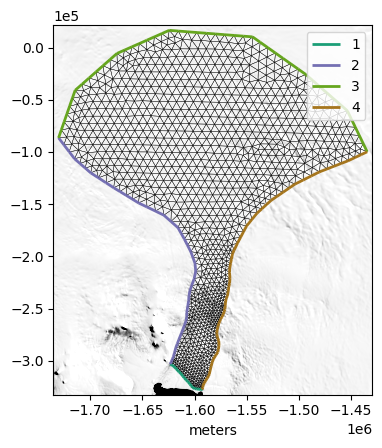

In [3]:
invert_pig.plot_mesh()

In [4]:
invert_pig.import_velocity_data(constant_val=0.01)
invert_pig.import_geophysics_data(name_list=['data/geophysics/ADMAP_MagneticAnomaly_5km.tif', 
                                                'data/geophysics/ANTGG_BouguerAnomaly_10km.tif', 
                                                'data/geophysics/GeothermalHeatFlux_5km.tif',
                                                'data/geophysics/ALBMAP_SurfaceAirTemperature_5km.tif',
                                                'data/geophysics/EIGEN-6C4_GravityDisturbance_10km.tif',
                                                'data/geophysics/ALBMAP_SnowAccumulation_Arthern_5km.tif',])

Reading velocity from measures database
C0 is constant: 0.01


In [5]:
u =  invert_pig.simulation()
firedrake.assemble(invert_pig.loss_functional_nosigma(u))

26972251.56748137

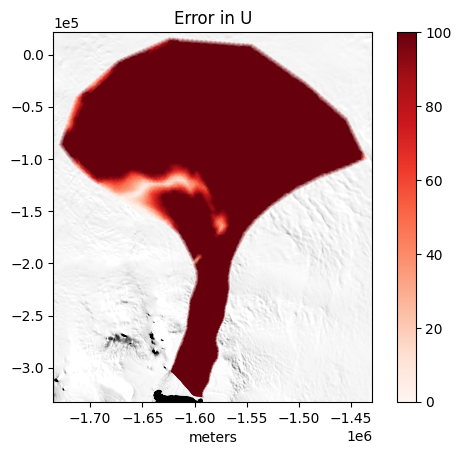

In [6]:
invert_pig.plot_u_error_no_sigma(u, vmax = 100)

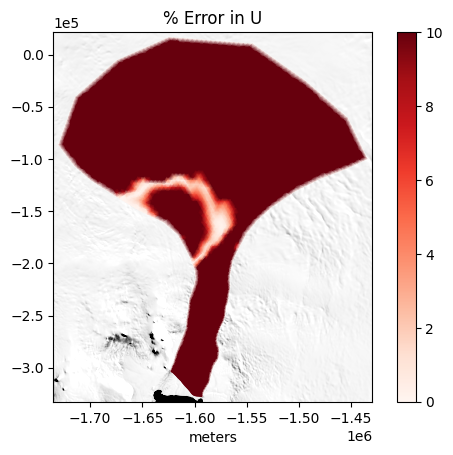

In [7]:
invert_pig.plot_u_error_percentage(u, vmax = 10)

In [8]:
invert_pig.default_u = u

In [9]:
df = invert_pig.get_dataframe(u)
df.to_csv('pig_baseline_geo_12_2_1.csv')

In [10]:
invert_pig.invert_C_theta_simultaneously(max_iterations=300, regularization_grad_fcn= True, loss_fcn_type = 'regular')

Using loss function with sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     9.539353e+06   7.593147e+02                  1.586947e+04   
  1     3.486379e+06   2.159048e+02   1.586947e+04   3.967367e+04   3         2         0         3         3         
  2     1.037151e+06   6.952250e+01   3.967367e+04   9.918418e+04   4         3         0         3         2         
  3     1.139235e+05   8.840226e+00   9.918418e+04   9.918418e+04   5         4         0         3         2         
  4     1.139235e+05   8.840226e+00   9.918418e+04   6.199011e+03   6         4         2         2         2         
  5     7.491536e+04   4.001668e+00   6.199011e+03   1.549753e+04   7         5         0         1         3         
  6     4.634990e+04   1.216035e+00   1.549753e+04   3.874382e+04   8         6         0         2         3         
  7     4.634990e+04   1.216035e+

In [11]:
u_optimized =  invert_pig.simulation()

In [12]:
firedrake.assemble(invert_pig.loss_functional_nosigma(u_optimized))

1361.1271808125814

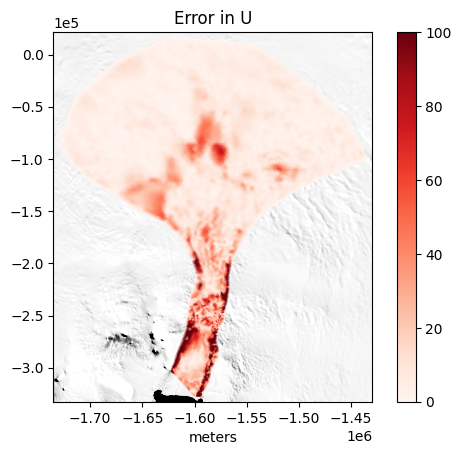

In [13]:
invert_pig.plot_u_error_no_sigma(u_optimized, vmax = 100)

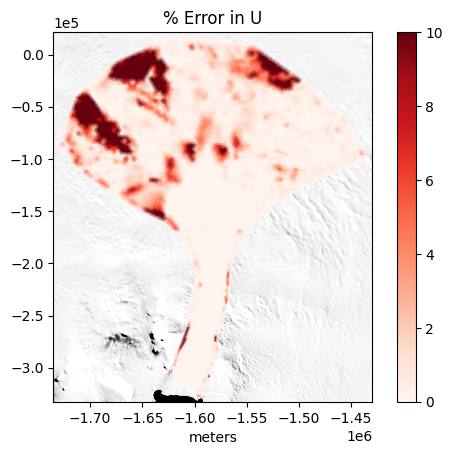

In [14]:
invert_pig.plot_u_error_percentage(u_optimized, vmax = 10)

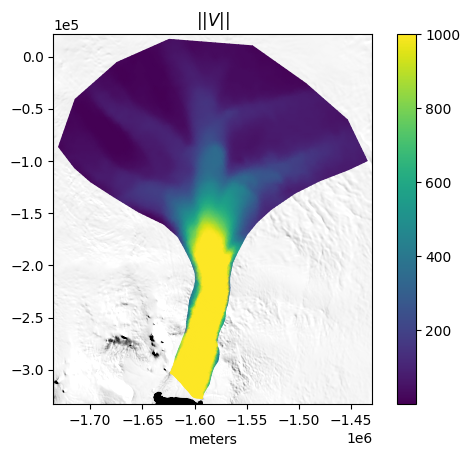

In [15]:
invert_pig.plot_u_mag(u_optimized, vmax = 1000)

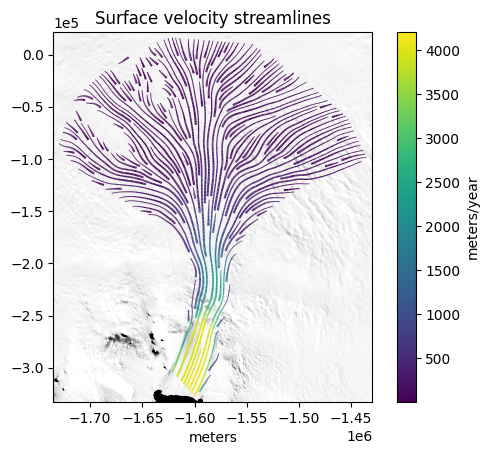

In [16]:
invert_pig.plot_streamline_u(u_optimized)

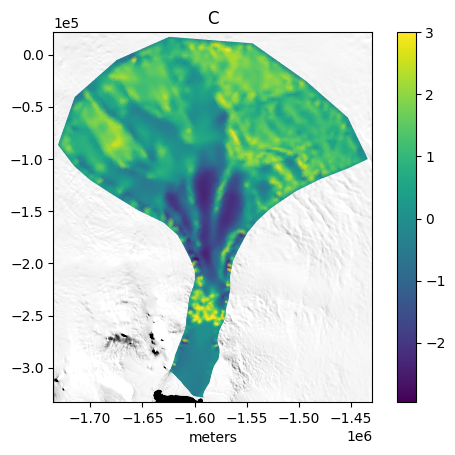

In [17]:
invert_pig.plot_C(vmax = 3)

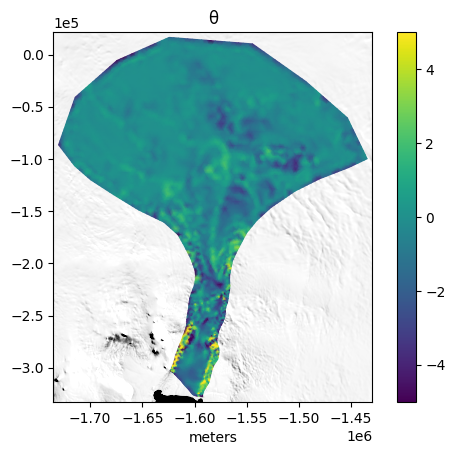

In [18]:
invert_pig.plot_theta(vmin = -5, vmax = 5)

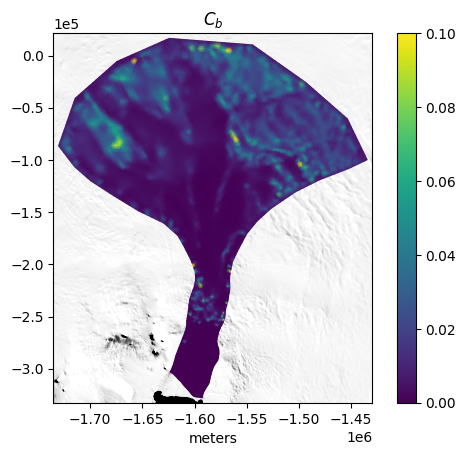

In [19]:
invert_pig.plot_C_total(vmax = 0.1)

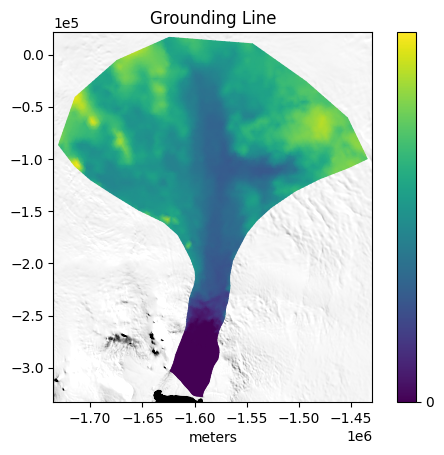

In [20]:
invert_pig.plot_grounding_line()

In [21]:
#invert_pig.inverse_u = invert_pig.u_initial
invert_pig.inverse_u = u_optimized

In [22]:
theta = invert_pig.θ
C = invert_pig.C

In [23]:
df = invert_pig.get_dataframe(u_optimized)
df.to_csv('regularized_const_01C_simultaneous_pig_r1_geo_12_2_1.csv')

In [24]:
invert_pig.opts = {"dirichlet_ids": invert_pig.drichlet_ids,
                    "side_wall_ids": invert_pig.side_ids,
                   "diagnostic_solver_type": "icepack",
                "diagnostic_solver_parameters": {
                    "max_iterations":50,},}
invert_pig.create_model_weertman()

In [34]:
invert_pig.compute_C_ML_regress(filename = 'model_4_dotson2_thwaites1_r1_geo_static', half = False, flip = False, use_driving_stress = False, C_bounds = [-50, 55], θ_bounds =[-102, 200], number_of_models = 14)
u_optimized =  invert_pig.simulation()

/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [35]:
firedrake.assemble(invert_pig.loss_functional_nosigma(u_optimized))
# 215402.4880117473

3878708.1658850876

In [36]:
df = invert_pig.get_dataframe(u_optimized)
df.to_csv('pig_ML_geo_4_static_2_1.csv')

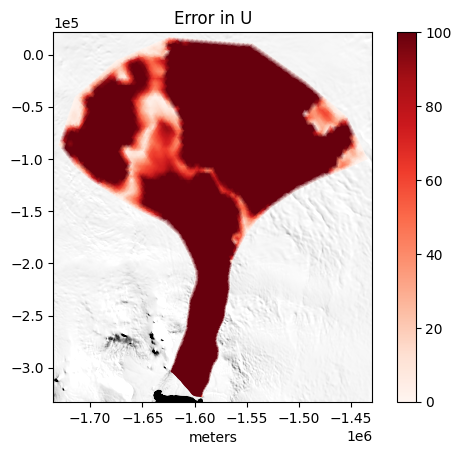

In [37]:
invert_pig.plot_u_error_no_sigma(u_optimized, vmax = 100)

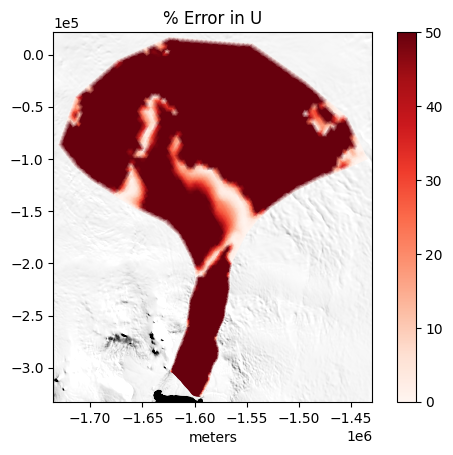

In [38]:
invert_pig.plot_u_error_percentage(u_optimized, vmax = 50)

In [39]:
invert_pig.ML_u = u_optimized

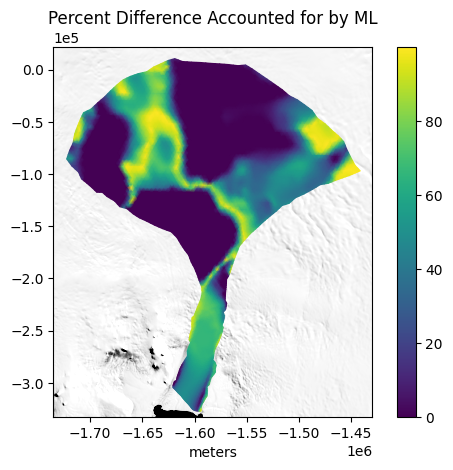

In [40]:
# Static2_1
invert_pig.plot_percent_accounted(vmin = 0)

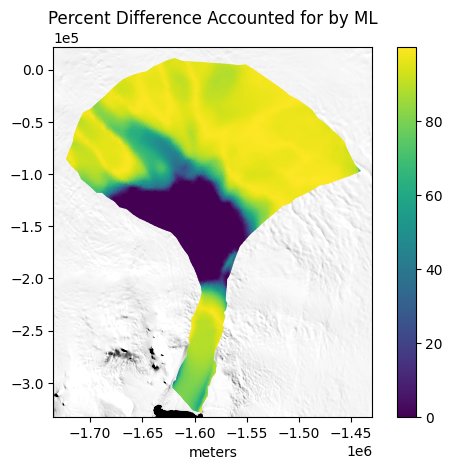

In [31]:
# Dynamic2_1
invert_pig.plot_percent_accounted(vmin = 0)

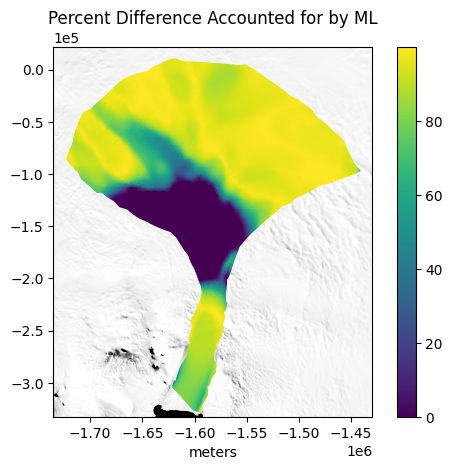

In [47]:
# Dynamic
invert_pig.plot_percent_accounted(vmin = 0)

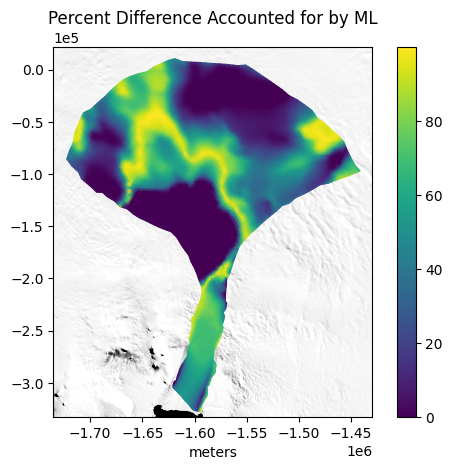

In [38]:
# Static
invert_pig.plot_percent_accounted(vmin = 0)

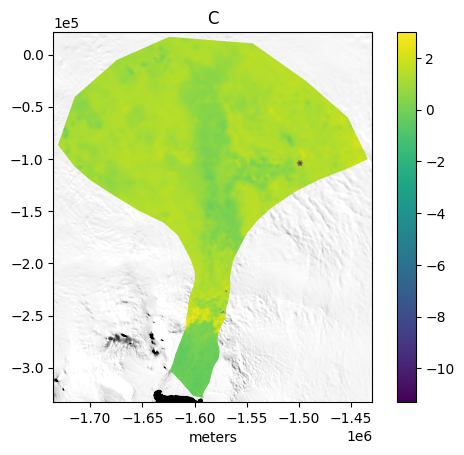

In [32]:
invert_pig.plot_C(vmax = 3)

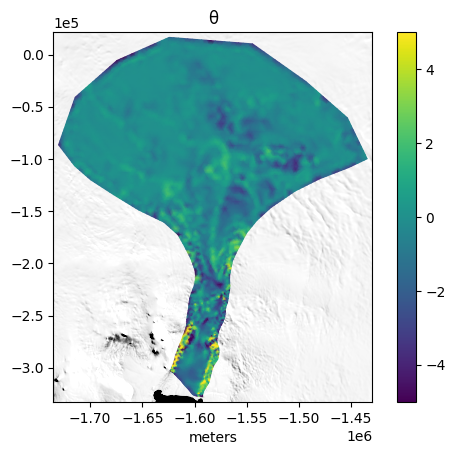

In [33]:
invert_pig.plot_theta(vmin = -5, vmax = 5)